In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("spam.csv", encoding='cp1252')


In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
# data cleaning
# EDA
# text preprocessing
# model building 
# evalaution
# improment
# website
#deploy


# 1. Data Cleaning

In [5]:
cols_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
data.drop(columns=[col for col in cols_to_drop if col in data.columns], inplace=True)


In [6]:
data.rename(columns={"v1": "target","v2": "text"},inplace=True)

In [7]:
data

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
data['target']=le.fit_transform(data['target'])

In [11]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
data.duplicated().sum()

403

In [13]:
data=data.drop_duplicates(keep='first')

In [14]:
data.duplicated().sum()

0

# 2. EDA

In [15]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [16]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x1a3fd4d0620>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

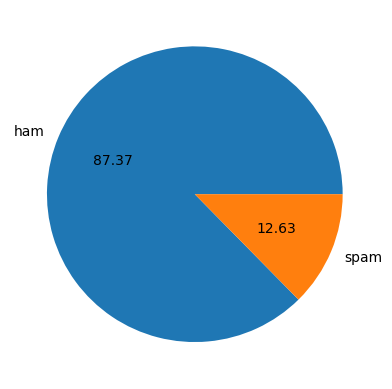

In [17]:
plt.pie(data['target'].value_counts(),labels=["ham","spam"],autopct="%.2f")

In [18]:
# data imbalnce

In [19]:
import nltk

In [20]:
data['num_characters']=data['text'].apply(len)

C:\Users\vishal haldar\AppData\Local\Temp\ipykernel_9396\2901880250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_characters']=data['text'].apply(len)


In [21]:
#num of word
data['num_word']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\vishal haldar\AppData\Local\Temp\ipykernel_9396\1765551385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_word']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [22]:
data['num_sent']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\vishal haldar\AppData\Local\Temp\ipykernel_9396\2001453596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_sent']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [23]:
data

,target,text,num_characters,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [24]:
data[['num_characters','num_word','num_sent']].describe()

,num_characters,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
data[data['target'] == 0][['num_characters','num_word','num_sent']].describe()


,num_characters,num_word,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
data[data['target'] == 1][['num_characters','num_word','num_sent']].describe()


,num_characters,num_word,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [27]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

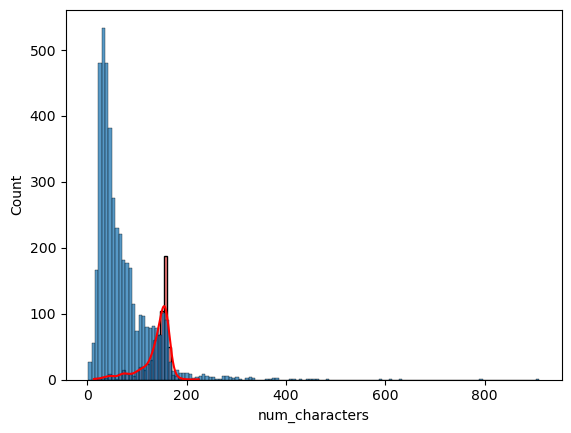

In [28]:
sns.histplot(data[data['target'] == 1]['num_characters'], color='red', bins=30, kde=True)
sns.histplot(data[data['target'] == 0]['num_characters'])

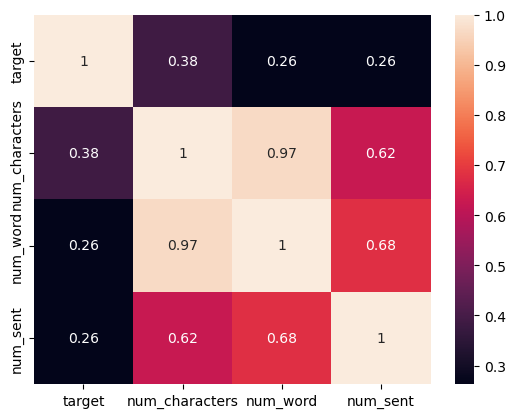

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Plot heatmap
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()


# 3. Data Preprocessing
     Loswer Case
     tokenization
     removing special character
     removing stop word and puncctutaion
     stemming

In [30]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        
        y.append(ps.stem(i))
        
    return " ".join(y)

In [31]:
transform_text("how are you vishal walking")

'vishal walk'

In [32]:
data['text_transform']=data['text'].apply(transform_text)

C:\Users\vishal haldar\AppData\Local\Temp\ipykernel_9396\3260653492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_transform']=data['text'].apply(transform_text)


In [33]:
data

,target,text,num_characters,num_word,num_sent,text_transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [34]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [35]:
spam_wc=wc.generate(data[data['target']==1]['text_transform'].str.cat(sep=" "))

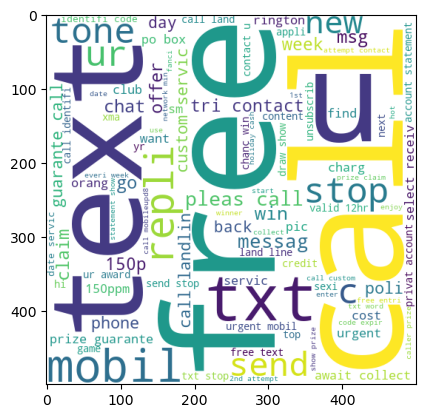

In [36]:
plt.imshow(spam_wc)

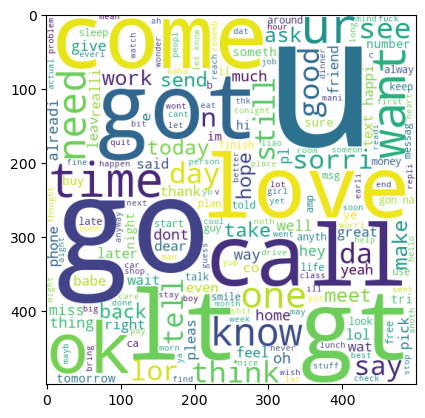

In [37]:
ham_wc=wc.generate(data[data['target']==0]['text_transform'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [41]:
spam_corpus=[]
for msg in data[data['target']==1]['text_transform'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [44]:
len(spam_corpus)

9939

# 4. model building

In [136]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
t=TfidfVectorizer(max_features=3000)

In [137]:
x=cv.fit_transform(data['text_transform']).toarray()


In [138]:
x=t.fit_transform(data['text_transform']).toarray()

In [139]:
x.shape

(5169, 3000)

In [140]:
y=data['target']

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [143]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [144]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [145]:
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8607350096711799
[[769 120]
 [ 24 121]]
0.5020746887966805


In [146]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [147]:
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [149]:
bnb=BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB()

In [150]:
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


In [153]:
import pickle
pickle.dump(t,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl",'wb'))